In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tensorflow.examples.tutorials.mnist import input_data
MNIST = input_data.read_data_sets('MNIST_data', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [9]:
lr = 0.1 # learning rate 
batch_size = 128 # the number of example we will consider per iterations
n_epochs = 2500 # number of iteration

# create placeholders for X and Y
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32, [None, 10])

# create variable for W and b
w = tf.Variable(tf.truncated_normal(shape = [784,10], stddev = 0.01), name = 'w')
b = tf.Variable(tf.zeros([1,10]),name = 'b')

logits = tf.matmul(X,w)+b
normalized_logits = tf.nn.softmax(logits)

# cross entropy loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = Y, logits = logits))

# mean_square loss
mean_square_loss = tf.reduce_mean(tf.square(Y - normalized_logits))

loss = cross_entropy

#Gradient descent optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate= lr).minimize(loss)

cp = tf.equal(tf.argmax(logits, axis =1), tf.argmax(Y,axis = 1))
acc = tf.reduce_mean(tf.cast(cp, tf.float32))


init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

for i in range(n_epochs):
    batch = MNIST.train.next_batch(batch_size)
    sess.run(opt, feed_dict={X:batch[0], Y:batch[1]})
    if(i%500 == 0):
        l = loss.eval(feed_dict={X:batch[0],Y:batch[1]})
        print("loss: {}".format(l))

a = acc.eval(feed_dict={X: MNIST.test.images, Y: MNIST.test.labels})
print("test acc: {}".format(a))








loss: 2.1108551025390625
loss: 0.3502383828163147
loss: 0.34167325496673584
loss: 0.2512718439102173
loss: 0.3359946012496948
test acc: 0.9200999736785889


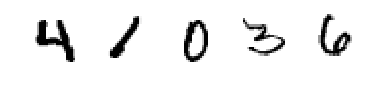

predicted 4, ground truth was 4
predicted 1, ground truth was 1
predicted 0, ground truth was 0
predicted 5, ground truth was 3
predicted 6, ground truth was 6


In [10]:
def plot_images(images):
    for i in range(images.shape[0]):
        plt.subplot(1, 5, i + 1) # Plotting 1 row of NUM_FIGURES.
        plt.axis('off')
        plt.imshow(images[i].reshape((28,28)), cmap = plt.cm.gray_r)
    plt.show()
    
# TODO: Take some random images from the MNIST dataset, run a prediction, and display the prediction and the actual label.

NUM_IMAGES = 5
rand_image_idx = np.random.randint(0, MNIST.test.images.shape[1], NUM_IMAGES)
images, labels = [MNIST.test.images[i] for i in rand_image_idx], [MNIST.test.labels[i] for i in rand_image_idx]
images, labels = np.array(images), np.array(labels)
plot_images(images)
for i in range(images.shape[0]):
    prediction = sess.run(logits, feed_dict = {X: images[i].reshape((1, images[i].shape[0])), Y: labels[i].reshape((1, labels[i].shape[0]))})
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(labels[i])
    print("predicted {}, ground truth was {}".format(predicted_label, actual_label))